Thermal coupling data. Hourly data not independent. Consider the difference, turn it into one series. The difference will hopefully start off looking like zero. This also removes the different SDs and whatnot. Change Detection on Wikipedia. The mean difference should be zero, but then will move away from zero. Does the difference go from flat, to linearly increasing, to maybe exponential? We're dealing with offline change detection. Make sure to plot the difference. Could also chunk up the data. Change in first couple years? Then check the next.

Could probably use detection algorithm, to see when that change is. 

Once we decide to use all 8 models, should stick to pairwise comparisons. 

Can also focus on top 5% of values and their differences. When do the peaks start to separate?

Hypothesis test of change vs no change. Likelihood ratio something something? We want to reduce some autocorrelation by taking fewer temps e.g. only at 4pm

The differences should look a bit normal.

In [1]:
import os

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import glob

from pathlib import Path

import scipy.stats as stats

from scipy import stats

In [2]:
# create function that takes BA and number of years, then outputs a plot or dataframe of their differences
def diff_values(input_BA, num_years): # input input_BA as string e.g. 'AEC' and num_years as integer 1-80
    
    # get a list of files based on input_BA and num_years to read in
    list_of_hot_files = glob.glob(os.path.join(r'C:\projects\CONUS_TGW_WRF_SSP585_HOT\CONUS_TGW_WRF_SSP585_HOT', f'{input_BA}_*.csv'))
    list_num_hot_files = list_of_hot_files[0 : num_years]
    list_of_cold_files = glob.glob(os.path.join(r'C:\projects\CONUS_TGW_WRF_SSP585_COLD\CONUS_TGW_WRF_SSP585_COLD', f'{input_BA}_*.csv'))
    list_num_cold_files = list_of_cold_files[0 : num_years]
    
    # create a dataframe of their differences
    for file_index in range(len(list_num_hot_files)):
        
        # read in each year as df
        hot_year_df = pd.read_csv(list_num_hot_files[file_index], index_col = None, header = 0)
        cold_year_df = pd.read_csv(list_num_cold_files[file_index], index_col = None, header = 0)
        
        # get difference values
        diff_values = hot_year_df['T2'] - cold_year_df['T2']
        diff_values_array = np.asarray(diff_values)
        diff_year_df = pd.DataFrame(diff_values_array, columns = ['T2_Differences'])

        if file_index == 0:
            diff_df = diff_year_df
        else: diff_df = pd.concat([diff_df, diff_year_df])
    
    plt.figure(figsize=(25, 10))
    plt.plot(diff_df, color = "red")
    plt.ylabel('T2 Difference')
    plt.title(input_BA + ' Temperature Differences over ' + str(num_years) + ' years')
    
    return diff_df

,T2_Differences
0,-0.01
1,-0.13
2,-0.11
3,-0.08
4,-0.23
...,...
8778,0.37
8779,0.33
8780,0.30
8781,0.35


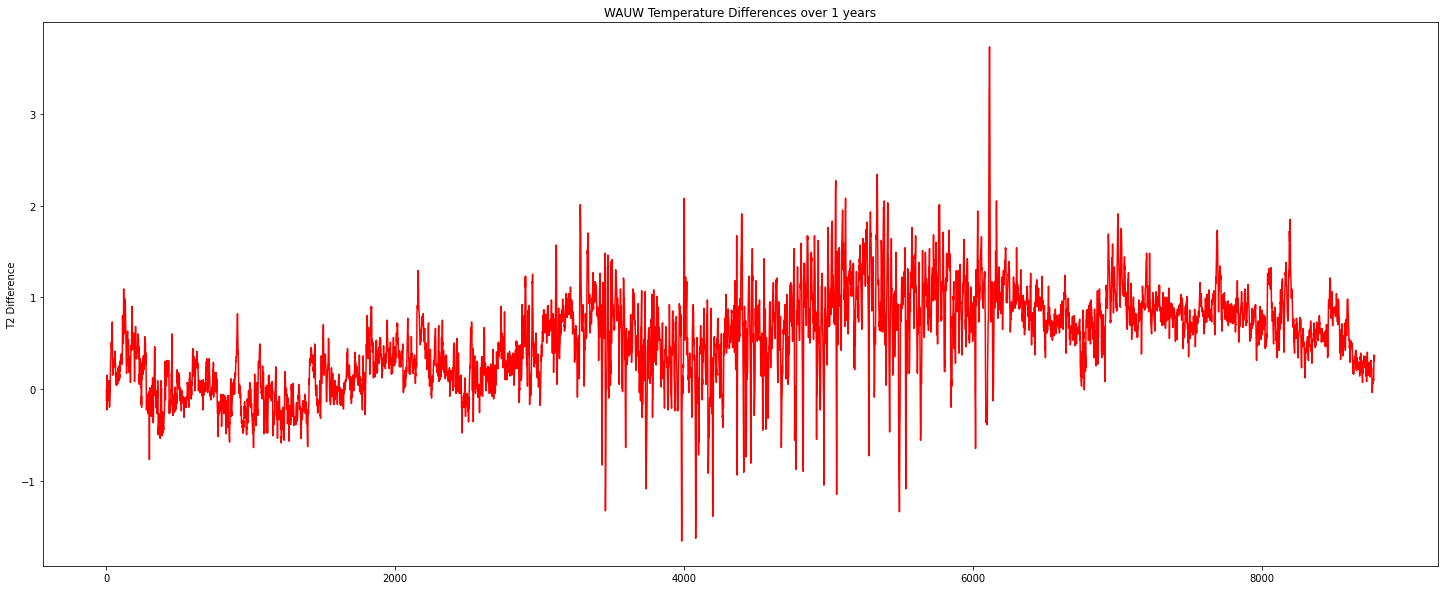

In [3]:
diff_values('WAUW', 1)

In [4]:
# now convert the function to top 5% of temps
def diff_values_5(input_BA, num_years): # input input_BA as string e.g. 'AEC' and num_years as integer 1-80
    
    # get a list of files based on input_BA and num_years to read in
    list_of_hot_files = glob.glob(os.path.join(r'C:\projects\CONUS_TGW_WRF_SSP585_HOT\CONUS_TGW_WRF_SSP585_HOT', f'{input_BA}_*.csv'))
    list_num_hot_files = list_of_hot_files[0 : num_years]
    list_of_cold_files = glob.glob(os.path.join(r'C:\projects\CONUS_TGW_WRF_SSP585_COLD\CONUS_TGW_WRF_SSP585_COLD', f'{input_BA}_*.csv'))
    list_num_cold_files = list_of_cold_files[0 : num_years]
    
    # create a dataframe of their differences
    for file_index in range(len(list_num_hot_files)):
        
        # read in each year as df
        hot_year_df = pd.read_csv(list_num_hot_files[file_index], index_col = None, header = 0)
        cold_year_df = pd.read_csv(list_num_cold_files[file_index], index_col = None, header = 0)
        
        # get difference values
        diff_values = hot_year_df['T2'] - cold_year_df['T2']
        diff_values_array = np.asarray(diff_values)
        diff_year_df = pd.DataFrame(diff_values_array, columns = ['T2_Differences'])

        if file_index == 0:
            diff_df = diff_year_df
        else: diff_df = pd.concat([diff_df, diff_year_df])
    
    # take top 5% of values in diff_df
    diff_list_5 = []
    diff_df_5_cutoff = diff_df['T2_Differences'].quantile(0.99)
    for t2_diff in diff_df['T2_Differences']:
        if t2_diff > diff_df_5_cutoff:
            diff_list_5.append(t2_diff)
    
    plt.figure(figsize=(25, 10))
    plt.plot(diff_list_5, color = "red")
    plt.ylabel('T2 Difference')
    plt.title(input_BA + ' Top 5% Temperature Differences over ' + str(num_years) + ' years')
    plt.xticks(range(2020, 2020 + (num_years)))
    
    return

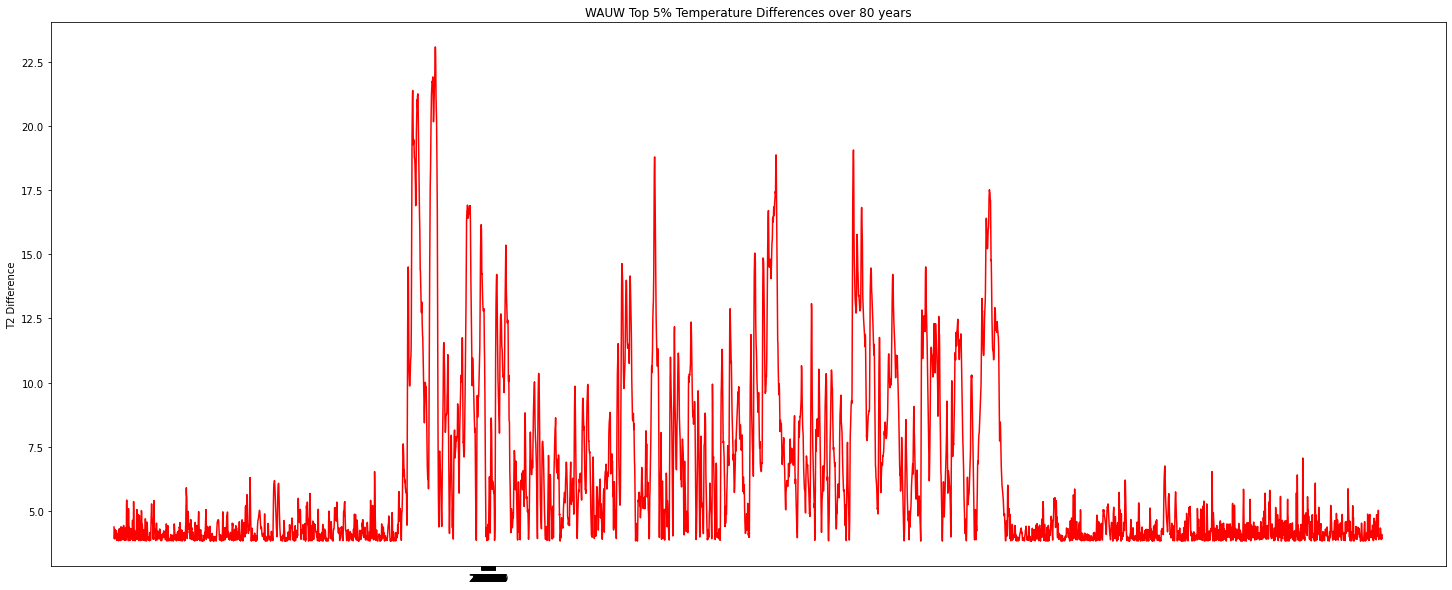

In [5]:
diff_values_5('WAUW', 80)

Okay how do we get a better trend-line as opposed to the up and down? Fewer datapoints? Less than top 5% of temps? And how to "scope in" on where change occurs? graph data for every few years and manually check?

loop over years, then loop over the months within the year. Load in monthly data chunks. Take those observations and pull top 5% of hot scenario. Then take the mean difference of the top 5% (between hot and cold) and the normal full set of observations (just to compare). Output dataframe with year, month, and the mean value, and can graph them both. Include one across BAs.

Should also try random sample from each year. Then think about t-tests for the mean.

In [65]:
def difference_values(input_BA): # do input_BA as string e.g. 'AEC'
    
    # create list of files to unpack for hot and cold scenario
    list_hot_files = glob.glob(os.path.join(r'C:\projects\CONUS_TGW_WRF_SSP585_HOT\CONUS_TGW_WRF_SSP585_HOT', f'{input_BA}_*.csv'))
    list_cold_files = glob.glob(os.path.join(r'C:\projects\CONUS_TGW_WRF_SSP585_COLD\CONUS_TGW_WRF_SSP585_COLD', f'{input_BA}_*.csv'))
    
    # get monthly chunks of data
    list_diff_top_5_means = []
    for file_index in range(len(list_hot_files)):
        
        # read in yearly data as df
        hot_year_df = pd.read_csv(list_hot_files[file_index], index_col = None, header = 0)
        cold_year_df = pd.read_csv(list_cold_files[file_index], index_col = None, header = 0)
        
        # add months column
        hot_year_df['Month'] = pd.DatetimeIndex(hot_year_df['Time_UTC']).month
        cold_year_df['Month'] = pd.DatetimeIndex(cold_year_df['Time_UTC']).month
        hot_year_df['Cold_T2'] = cold_year_df['T2']
        hot_year_df['T2_Diff'] = hot_year_df['T2'] - hot_year_df['Cold_T2']
        
        # create the monthly dfs for hot and cold
        hot_df1 = hot_year_df[hot_year_df['Month'] == 1]
        hot_df2 = hot_year_df[hot_year_df['Month'] == 2]
        hot_df3 = hot_year_df[hot_year_df['Month'] == 3]
        hot_df4 = hot_year_df[hot_year_df['Month'] == 4]
        hot_df5 = hot_year_df[hot_year_df['Month'] == 5]
        hot_df6 = hot_year_df[hot_year_df['Month'] == 6]
        hot_df7 = hot_year_df[hot_year_df['Month'] == 7]
        hot_df8 = hot_year_df[hot_year_df['Month'] == 8]
        hot_df9 = hot_year_df[hot_year_df['Month'] == 9]
        hot_df10 = hot_year_df[hot_year_df['Month'] == 10]
        hot_df11 = hot_year_df[hot_year_df['Month'] == 11]
        hot_df12 = hot_year_df[hot_year_df['Month'] == 12]
        
        hot_monthly_list = [hot_df1, hot_df2, hot_df3, hot_df4, hot_df5, hot_df6, hot_df7, hot_df8, hot_df9, hot_df10, hot_df11, hot_df12]
        
        for month_df in hot_monthly_list:
            month_5_cutoff = month_df['T2'].quantile(0.95)
            hot_top_5 = month_df[month_df['T2'] >= month_5_cutoff]
            list_diff_top_5_means.append(hot_top_5['T2_Diff'].mean())
            
        
        # cold_df1 = cold_year_df[cold_year_df['Month'] == 1]
        # cold_df2 = cold_year_df[cold_year_df['Month'] == 2]
        # cold_df3 = cold_year_df[cold_year_df['Month'] == 3]
        # cold_df4 = cold_year_df[cold_year_df['Month'] == 4]
        # cold_df5 = cold_year_df[cold_year_df['Month'] == 5]
        # cold_df6 = cold_year_df[cold_year_df['Month'] == 6]
        # cold_df7 = cold_year_df[cold_year_df['Month'] == 7]
        # cold_df8 = cold_year_df[cold_year_df['Month'] == 8]
        # cold_df9 = cold_year_df[cold_year_df['Month'] == 9]
        # cold_df10 = cold_year_df[cold_year_df['Month'] == 10]
        # cold_df11 = cold_year_df[cold_year_df['Month'] == 11]
        # cold_df12 = cold_year_df[cold_year_df['Month'] == 12]
        
        # cold_monthly_list = [cold_df1, cold_df2, cold_df3, cold_df4, cold_df5, cold_df6, cold_df7, cold_df8, cold_df9, cold_df10, cold_df11, cold_df12]
        
        # for each monthly, pull the top 5% of hot temps, and then match the cold to it
        # monthly_5s = []
        # for month_df in hot_monthly_list:
            # month_5_cutoff = month_df['T2'].quantile(0.95)
            # hot_monthly_top_5 = month_df[month_df['T2'] >= month_5_cutoff]
            # cold_monthly_top_5 = cold_monthly_list[index(month_df)]
            # monthly_5s.append(hot_monthly_top_5['T2'].mean())
        
    return len(list_diff_top_5_means)

In [66]:
difference_values('AEC')

960